In [1]:
# 데이터 불러오기.
import pandas as pd

In [2]:
ROOT_PATH = 'data_mv/'
# rating_df = pd.read_csv(ROOT_PATH + 'ratings.dat', names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', engine='python')
rating_df = pd.read_csv(ROOT_PATH + 'ratings.dat', index_col=0)
# rating_df.columns = ['index', 'user_id', 'movie_id', 'rating', 'time']
rating_df.head()

user_id  movie_id  rating       time
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [3]:
# 영화에 대한 meta 정보를 가지고 있는 데이터 셋.
movie_df = pd.read_csv(ROOT_PATH + 'movies.dat', names=['movie_id', 'title', 'genre'], delimiter='::', engine='python', encoding='ISO-8859-1')
# movie_df = pd.read_csv(ROOT_PATH + 'movies.csv')
movie_df.head()

movie_id                               title                         genre
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [4]:
# 유저에 대한 정보.
user_df = pd.read_csv(ROOT_PATH + 'users.dat', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', engine='python')
# user_df = pd.read_csv(ROOT_PATH + 'users.csv')
user_df.head()

user_id gender  age  occupation zipcode
0        1      F    1          10   48067
1        2      M   56          16   70072
2        3      M   25          15   55117
3        4      M   45           7   02460
4        5      M   25          20   55455

In [5]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
 3   time      1000209 non-null  int64
dtypes: int64(4)
memory usage: 38.2 MB


<AxesSubplot: >

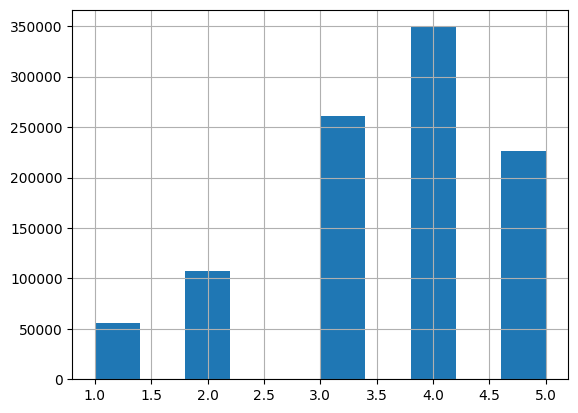

In [8]:
# 점수의 분포를 살펴보자. 3~4에 많이 분포되어 있다.
rating_df['rating'].hist()

<AxesSubplot: >

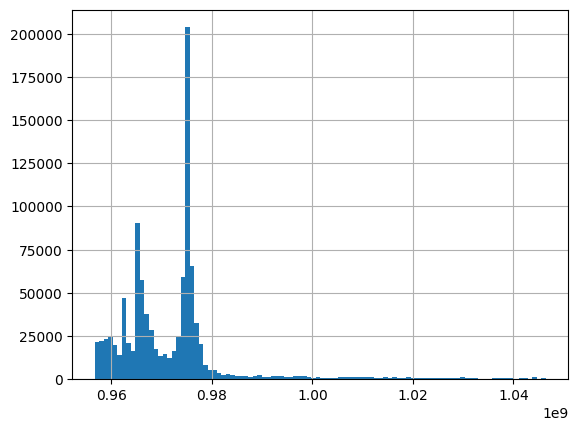

In [9]:
# 특정 시간대 안쪽으로 집중되어 있는것을 알수 있다.
rating_df['time'].hist(bins=100)

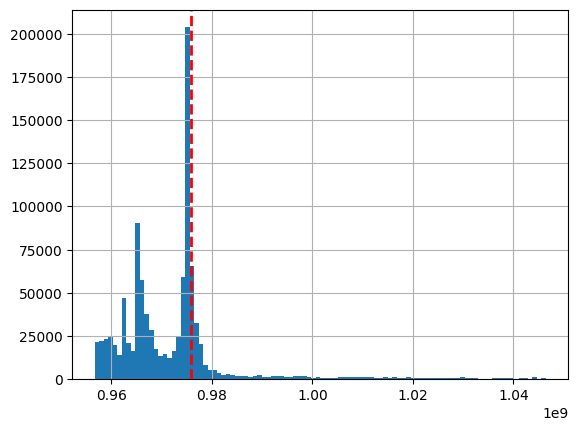

In [10]:
ax = rating_df['time'].hist(bins=100)
# 시간대를 기준으로 데이터셋 분리
split_bound = rating_df['time'].quantile(q=0.8)
# 80%에 해당하는 데이터 범위가 어느정도인지 눈으로 확인해보자.
ax.axvline(x=split_bound, color='r', linestyle='dashed', linewidth=2)

In [11]:
# rating 데이터에서 user id의 갯수가 몇개인지 확인해 보자.
# 6040명이 평가에 참여한것을 알 수  있다.
len(rating_df['user_id'].unique())

6040

In [12]:
# 영화의 개수가 몇개인지 학인해 보자.
# 3706 개의 영화가 rating 데이터셋에 있다.
len(rating_df['movie_id'].unique())

3706

In [13]:
# movie 메타 데이터에서 장르컬럼으로 몇개씩 있는지 출력해보자.
# 그런데 장르 컬럼의 데이터가 '|' 로 구분되어 있는것을 알 수 있다.
movie_df['genre'].value_counts()

Drama                                  843
Comedy                                 521
Horror                                 178
Comedy|Drama                           162
Comedy|Romance                         142
                                      ... 
Action|Comedy|Crime|Horror|Thriller      1
Action|Drama|Thriller|War                1
Action|Adventure|Children's              1
Action|Adventure|Children's|Fantasy      1
Adventure|Crime|Sci-Fi|Thriller          1
Name: genre, Length: 301, dtype: int64

In [14]:
# 장르 데이터를 리스트 형태로 변경하자. split() 함수를 쓰면 list형태로 반환해준다.
movie_df['genre'].apply( lambda x : x.split('|'))

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genre, Length: 3883, dtype: object

In [15]:
# 리스트 형태로 반환된 데이터를 'genre_list'라는 새로운 컬럼에 저장하자.
movie_df['genre_list'] = movie_df['genre'].apply( lambda x : x.split('|'))
# 'genre_list'를 확인해보자.
movie_df['genre_list']

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genre_list, Length: 3883, dtype: object

In [16]:
from collections import Counter

In [17]:
# 2차원 배열에 있는 각각의 요소별로 몇개씩 존재하는 갯수를 세어주는 함수이다. 
# movie_df['genre_list'].tolist() 하면 2차원 배열로 형변환이 되고 그 2차원 배열속에 있는 각 요소별로 count를 셀 수 있다.
genre_2d_list = movie_df['genre_list'].tolist()
results= Counter(sum(genre_2d_list, []))
results

Counter({'Animation': 105,
         "Children's": 251,
         'Comedy': 1200,
         'Adventure': 283,
         'Fantasy': 68,
         'Romance': 471,
         'Drama': 1603,
         'Action': 503,
         'Crime': 211,
         'Thriller': 492,
         'Horror': 343,
         'Sci-Fi': 276,
         'Documentary': 127,
         'War': 143,
         'Musical': 114,
         'Mystery': 106,
         'Film-Noir': 44,
         'Western': 68})

In [18]:
movie_df['title'].head()

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

In [19]:
# 타이틀안에는 개봉연도를 포함하고 있다. 
# 그래서 타이틀에서 개봉연도만 뽑아내보자. 이때 10년단위로 뽑기 위해서 연도의 맨 뒤자리는 잘라내기로 한다.
# 그러면 아래와 같이 10년단위로 연도가 출력이 된다.
movie_df['title'].apply(lambda x: x[-5:-2])

0       199
1       199
2       199
3       199
4       199
       ... 
3878    200
3879    200
3880    200
3881    200
3882    200
Name: title, Length: 3883, dtype: object

In [20]:
# 그래서 value_counts()를 이용하여 연도별 영화의 개수를 확인 해보자. 1910년에는 3개의 영화밖에 없다.
movie_df['title'].apply(lambda x: x[-5:-2]).value_counts()

199    2283
198     598
197     247
196     191
195     168
200     156
194     126
193      77
192      34
191       3
Name: title, dtype: int64

In [21]:
# 10년 단위의 개봉연도 컬럼('release_year')에 해당 데이터를 저장해 두자.
movie_df['release_year'] = movie_df['title'].apply(lambda x: x[-5:-2])

In [22]:
movie_df['release_year'].value_counts()

199    2283
198     598
197     247
196     191
195     168
200     156
194     126
193      77
192      34
191       3
Name: release_year, dtype: int64

In [23]:
# 새롭게 생성된 movie_df를 확인해보자.
movie_df.head()

movie_id                               title                         genre  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

                         genre_list release_year  
0   [Animation, Children's, Comedy]          199  
1  [Adventure, Children's, Fantasy]          199  
2                 [Comedy, Romance]          199  
3                   [Comedy, Drama]          199  
4                          [Comedy]          199

In [24]:
# 이제 user_df에서 성별의 비율이 어느정도 되는지 확인해 보자.
user_df['gender'].value_counts()

M    4331
F    1709
Name: gender, dtype: int64

In [25]:
# 나이도 어떻게 분포되어 있는지 확인해보자.
user_df['age'].value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: age, dtype: int64

In [26]:
# 나이 또한 10 단위로 나누어 저장해 보자.
# 그러기 위해 아래와 같이 간단한 함수를 정의하였다.
def apply_bucketize(x):
    if x == 1:
        return False
    elif x >= 50:
        return "50"
    elif x < 50 and x >= 40:
        return "40"
    elif x < 40 and x >= 30:
        return "30"
    elif x < 30 and x >= 20:
        return "20"
    elif x < 20 and x >= 10:
        return "10"
        
# 나이를 10년 단위로 변환하여 'age_bucket'이라는 새로운 컬럼에 저장한다.
user_df['age_bucket'] = user_df['age'].apply(lambda x : apply_bucketize(x))

In [27]:
# 'age_bucket' 컬럼을 확인해보자. 의도했던대로 잘 저장이 되었다.
user_df['age_bucket'].head()

0    False
1       50
2       20
3       40
4       20
Name: age_bucket, dtype: object

In [28]:
# 이제 연령대별로 user가 몇명이 있는지 확인해 보자.
user_df['age_bucket'].value_counts()

20       2096
30       1193
10       1103
50        876
40        550
False     222
Name: age_bucket, dtype: int64

In [29]:
# 'occupation'을 확인해보자. 
# 단순 숫자 형태로 되어 있다. 어떤 의미인지 알 수 없으므로 활용하기 어려울것 같다.
user_df['occupation'].value_counts()

4     759
0     711
7     679
1     528
17    502
12    388
14    302
20    281
2     267
16    241
6     236
10    195
3     173
15    144
13    142
11    129
5     112
9      92
19     72
18     70
8      17
Name: occupation, dtype: int64

In [30]:
# 'zipcode'도 확인해 보자. 
# 마찬가지로 단순 숫자형태로 되어 있고 어떤 의미인지 알 수 없으므로 활용하기 어려울것 같음.
user_df['zipcode'].value_counts()

48104    19
22903    18
55104    17
94110    17
55455    16
         ..
80236     1
19428     1
33073     1
99005     1
14706     1
Name: zipcode, Length: 3439, dtype: int64

EDA 정리
1. 누구에게 무엇을 어떻게 추처할것인가? 그리고 추천 했다면 평가는 어떻게 할 것인가?

추천에 활용할 데이터 탐색.
추천 서비스에 활용할 수 있는 시간대 정보 탐색.
- 몇명의 유저가 있는지, 몇개의 아이템이 있는지 확인했음. 

추천의 규칙으로 활용할 수 있는 요소들은 어떤게 있나?
- 장르, 개봉연도.
- 유저의 성별, 나이.

In [31]:
# 인기도 기반 추천 목록을 생성해보자 - 현재 잘 나가는 영화(사용자 평점 기준으로)
# 우선 rating_df가 메인 프레임 이므로 이를 기준으로 movie_df와 user_df를 통합한다.
rating_df = pd.merge(rating_df, movie_df, on=['movie_id'], how='left')

In [32]:
# user_df를 통합한다.
rating_df = pd.merge(rating_df, user_df, on=['user_id'], how='left')

In [33]:
# 최종적으로 'rating_df'를 출력해보자.
rating_df.head()

user_id  movie_id  rating       time  \
0        1      1193       5  978300760   
1        1       661       3  978302109   
2        1       914       3  978301968   
3        1      3408       4  978300275   
4        1      2355       5  978824291   

                                    title                         genre  \
0  One Flew Over the Cuckoo's Nest (1975)                         Drama   
1        James and the Giant Peach (1996)  Animation|Children's|Musical   
2                     My Fair Lady (1964)               Musical|Romance   
3                  Erin Brockovich (2000)                         Drama   
4                    Bug's Life, A (1998)   Animation|Children's|Comedy   

                         genre_list release_year gender  age  occupation  \
0                           [Drama]          197      F    1          10   
1  [Animation, Children's, Musical]          199      F    1          10   
2                [Musical, Romance]          196      F    1          10   
3                           [Drama]          200      F    1          10   
4   [Animation, Children's, Comedy]          199      F    1          10   

  zipcode age_bucket  
0   48067      False  
1   48067      False  
2   48067      False  
3   48067      False  
4   48067      False

In [34]:
# 그리고 결측 데이터(null)가 있는지 확인해보자.
# 결측 데이터가 하나도 없는것을 확인할 수 있다.
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   user_id       1000209 non-null  int64 
 1   movie_id      1000209 non-null  int64 
 2   rating        1000209 non-null  int64 
 3   time          1000209 non-null  int64 
 4   title         1000209 non-null  object
 5   genre         1000209 non-null  object
 6   genre_list    1000209 non-null  object
 7   release_year  1000209 non-null  object
 8   gender        1000209 non-null  object
 9   age           1000209 non-null  int64 
 10  occupation    1000209 non-null  int64 
 11  zipcode       1000209 non-null  object
 12  age_bucket    1000209 non-null  object
dtypes: int64(6), object(7)
memory usage: 106.8+ MB


In [35]:
# 평점 기반 인기 목록을 생성해 보자.
# rating_df에서 영화별로 그룹핑 한 다음 평점의 평균값을 출력해보자.
rating_df.groupby('movie_id')['rating'].mean()

movie_id
1       4.146846
2       3.201141
3       3.016736
4       2.729412
5       3.006757
          ...   
3948    3.635731
3949    4.115132
3950    3.666667
3951    3.900000
3952    3.780928
Name: rating, Length: 3706, dtype: float64

In [36]:
# 이 데이터를 다시 내림 차순으로 정렬해보자. 그러면 평점 기준으로 점수가 높은 순으로 정렬이 된다.
rating_df.groupby('movie_id')['rating'].mean().sort_values(ascending=False)

movie_id
989     5.0
3881    5.0
1830    5.0
3382    5.0
787     5.0
       ... 
826     1.0
3228    1.0
2845    1.0
3209    1.0
142     1.0
Name: rating, Length: 3706, dtype: float64

In [37]:
# 그런데 이 데이터는 평가한 사람의 수자를 고려하지 않았다. 
# 즉, 하나의 영화에 한사람만이 평점을 부여했고 그 점수가 5점 이라면 이 평점 데이터는 신뢰할 수 있는가?
# 신뢰할 수 없다고 본다. 
# 따라서 영화별로 그룹핑을 하고 평가 개수를 확인해야 한다. 그래서 일정 평가 개수이상이 되는 영화면 추려야한다. 
rating_df.groupby('movie_id')['rating'].count()


movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3706, dtype: int64

<AxesSubplot: >

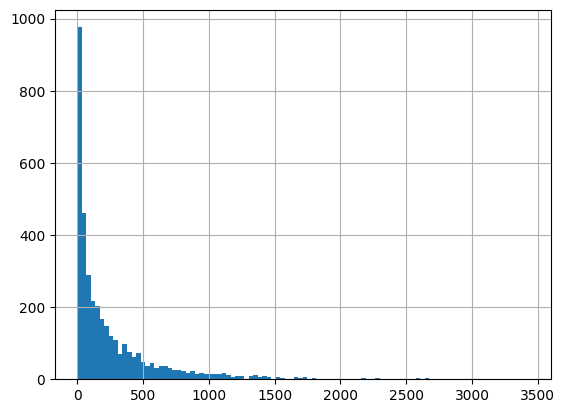

In [38]:
# 눈으로 확인할 수 있게 히스토그램으로 확인해보자.
# 대부분의 영화가 평가 개수가 1개 또는 2개 정도로 적다는것을 알 수 있다.
rating_df.groupby('movie_id')['rating'].count().hist(bins=100)

In [39]:
# 우선 평가 개수에 대한 시리즈 데이터를 만들어보자.
rating_count_series = rating_df.groupby('movie_id')['rating'].count()
type(rating_count_series)

pandas.core.series.Series

In [40]:
# 여기서 평가 개수가 10개 이상인 것들만 추출해보자.
# 총 3260개의 영화가 출력되었다.
rating_count_series[rating_count_series >= 10]

movie_id
1       2077
2        701
3        478
4        170
5        296
        ... 
3948     862
3949     304
3950      54
3951      40
3952     388
Name: rating, Length: 3260, dtype: int64

In [41]:
# 10개 이상의 평가를 받은 영화의 movie_id를 저장하자. 여기서는 index가 movie_id이므로.
# 시리즈의 index를 tolist()로 변환해서 저장한다.
filtered_movie_id = rating_count_series[rating_count_series >= 10].index.tolist()
filtered_movie_id

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 52,
 54,
 55,
 57,
 58,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 92,
 93,
 94,
 95,
 96,
 97,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 110,
 111,
 112,
 113,
 114,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 131,
 132,
 135,
 137,
 140,
 141,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,


In [42]:
# 이제 rating_df(전체 데이터셋)에서 이것이 바로 10이상의 평가를 받은 영화의 movie_id를 적용하여 
# 해당 목록을 출력해본다.
rating_10count_over_df = rating_df[ rating_df['movie_id'].isin(filtered_movie_id)]
rating_10count_over_df

user_id  movie_id  rating       time  \
0              1      1193       5  978300760   
1              1       661       3  978302109   
2              1       914       3  978301968   
3              1      3408       4  978300275   
4              1      2355       5  978824291   
...          ...       ...     ...        ...   
1000204     6040      1091       1  956716541   
1000205     6040      1094       5  956704887   
1000206     6040       562       5  956704746   
1000207     6040      1096       4  956715648   
1000208     6040      1097       4  956715569   

                                          title  \
0        One Flew Over the Cuckoo's Nest (1975)   
1              James and the Giant Peach (1996)   
2                           My Fair Lady (1964)   
3                        Erin Brockovich (2000)   
4                          Bug's Life, A (1998)   
...                                         ...   
1000204              Weekend at Bernie's (1989)   
1000205                 Crying Game, The (1992)   
1000206         Welcome to the Dollhouse (1995)   
1000207                  Sophie's Choice (1982)   
1000208       E.T. the Extra-Terrestrial (1982)   

                                   genre  \
0                                  Drama   
1           Animation|Children's|Musical   
2                        Musical|Romance   
3                                  Drama   
4            Animation|Children's|Comedy   
...                                  ...   
1000204                           Comedy   
1000205                Drama|Romance|War   
1000206                     Comedy|Drama   
1000207                            Drama   
1000208  Children's|Drama|Fantasy|Sci-Fi   

                                   genre_list release_year gender  age  \
0                                     [Drama]          197      F    1   
1            [Animation, Children's, Musical]          199      F    1   
2                          [Musical, Romance]          196      F    1   
3                                     [Drama]          200      F    1   
4             [Animation, Children's, Comedy]          199      F    1   
...                                       ...          ...    ...  ...   
1000204                              [Comedy]          198      M   25   
1000205                 [Drama, Romance, War]          199      M   25   
1000206                       [Comedy, Drama]          199      M   25   
1000207                               [Drama]          198      M   25   
1000208  [Children's, Drama, Fantasy, Sci-Fi]          198      M   25   

         occupation zipcode age_bucket  
0                10   48067      False  
1                10   48067      False  
2                10   48067      False  
3                10   48067      False  
4                10   48067      False  
...             ...     ...        ...  
1000204           6   11106         20  
1000205           6   11106         20  
1000206           6   11106         20  
1000207           6   11106         20  
1000208           6   11106         20  

[998539 rows x 13 columns]

In [43]:
# 이 데이터(평가 개수가 10개 이상인 영화 목록)에서 다시 movie_id로 그룹핑해서 rating의 평균값을 구해하고
# 그리고 내림 차순으로 정렬하게 되면 아래와 같다.
rating_10count_over_mean_sorted_df = rating_10count_over_df.groupby('movie_id')['rating'].mean().sort_values(ascending=False)
rating_10count_over_mean_sorted_df

movie_id
2905    4.608696
2019    4.560510
318     4.554558
858     4.524966
745     4.520548
          ...   
3573    1.461538
1323    1.372093
1739    1.361702
1495    1.318182
3574    1.058824
Name: rating, Length: 3260, dtype: float64

In [44]:
# 여기서 상위 20개 영화 index를 추출해보자.
high_rating_20_movie_ids = rating_10count_over_mean_sorted_df.index.tolist()[:20]
# high_rating_movie_ids = rating_df[ rating_df['movie_id'].isin(filtered_movie_id) ].groupby('movie_id')['rating'].mean().sort_values(ascending=False).index.tolist()[:20]
high_rating_20_movie_ids

[2905,
 2019,
 318,
 858,
 745,
 50,
 527,
 1148,
 922,
 1198,
 904,
 1178,
 260,
 1212,
 750,
 3338,
 720,
 1207,
 3435,
 912]

### 이제 장르별로 평점이 높은 영화 목록을 생성해보자 ###

In [45]:
# 먼저 장르 컬럼을 확인해 보자.
rating_df['genre_list']

0                                       [Drama]
1              [Animation, Children's, Musical]
2                            [Musical, Romance]
3                                       [Drama]
4               [Animation, Children's, Comedy]
                           ...                 
1000204                                [Comedy]
1000205                   [Drama, Romance, War]
1000206                         [Comedy, Drama]
1000207                                 [Drama]
1000208    [Children's, Drama, Fantasy, Sci-Fi]
Name: genre_list, Length: 1000209, dtype: object

In [46]:
# 장르별로 영화의 rating 합계와 rating count를 저장하는 딕셔너리를 만들어보자.
genre_dict = {}
i = 0
for index, row in rating_df.iterrows():    
    # if i > 5:
    #     break
    # print(row['genre_list'])
    for genre in row['genre_list']:
        # 장르가 딕셔너리에 없다면 장르를 키로 해서 딕셔너리에 추가.
        if genre not in genre_dict:
            # print(genre)
            genre_dict[genre] = {}
            # movie id를 키로 해서 child 딕셔너리 추가.
            genre_dict[genre][row['movie_id']] = {}
            genre_dict[genre][row['movie_id']]['count'] = 1
            genre_dict[genre][row['movie_id']]['sum'] = row['rating']
        else:
            if row['movie_id'] in genre_dict[genre]:
                genre_dict[genre][row['movie_id']]['count'] += 1
                genre_dict[genre][row['movie_id']]['sum'] += row['rating']
            else:
                genre_dict[genre][row['movie_id']] = {}
                genre_dict[genre][row['movie_id']]['count'] = 1
                genre_dict[genre][row['movie_id']]['sum'] = row['rating']
                
            # print(genre)
    i += 1 

In [47]:
# 완성된 장르별 영화 딕셔너리.
genre_dict

{'Drama': {1193: {'count': 1725, 'sum': 7574},
  3408: {'count': 1315, 'sum': 5081},
  1287: {'count': 704, 'sum': 2894},
  2804: {'count': 1352, 'sum': 5731},
  919: {'count': 1718, 'sum': 7298},
  2398: {'count': 380, 'sum': 1505},
  3105: {'count': 680, 'sum': 2571},
  527: {'count': 2304, 'sum': 10392},
  1097: {'count': 2269, 'sum': 8997},
  1721: {'count': 1546, 'sum': 5540},
  1545: {'count': 73, 'sum': 297},
  3186: {'count': 431, 'sum': 1499},
  1836: {'count': 135, 'sum': 447},
  150: {'count': 1251, 'sum': 5096},
  1961: {'count': 1330, 'sum': 5391},
  1962: {'count': 652, 'sum': 2528},
  1207: {'count': 928, 'sum': 4107},
  2028: {'count': 2653, 'sum': 11507},
  531: {'count': 338, 'sum': 1274},
  608: {'count': 2513, 'sum': 10692},
  1246: {'count': 855, 'sum': 3425},
  1357: {'count': 548, 'sum': 2086},
  3068: {'count': 379, 'sum': 1465},
  647: {'count': 441, 'sum': 1567},
  2194: {'count': 1127, 'sum': 4517},
  2268: {'count': 1061, 'sum': 4171},
  1103: {'count': 402,

In [48]:
# 이제 장르별로 영화를 rating sum과 count를 이용하여 평균값을 구해 저장해보자.
# 드라마 장르를 예를 들면 아래와 같다.
test_dict = {'Drama': {1193: {'count': 1725, 'sum': 7574},
  3408: {'count': 1315, 'sum': 5081},
  1287: {'count': 704, 'sum': 2894},
  2804: {'count': 1352, 'sum': 5731},
  919: {'count': 1718, 'sum': 7298},
  2398: {'count': 380, 'sum': 1505},
  3105: {'count': 680, 'sum': 2571},
  527: {'count': 2304, 'sum': 10392},
  1097: {'count': 2269, 'sum': 8997}}
}

In [49]:
# 딕셔너리 안에 있는 영화를 반복문을 통해 접근하면서 각각 sum과 count를 이용하여 평균값을 구한다.
# 그래서 'mscore'라는 새로운 딕셔너리 컬럼에 저장한다.
test_drama_dict = test_dict['Drama']
for movie_id in test_drama_dict:
    test_drama_dict[movie_id]['mscore'] = test_dict['Drama'][movie_id]['sum']/test_dict['Drama'][movie_id]['count']

test_dict

{'Drama': {1193: {'count': 1725, 'sum': 7574, 'mscore': 4.390724637681159},
  3408: {'count': 1315, 'sum': 5081, 'mscore': 3.863878326996198},
  1287: {'count': 704, 'sum': 2894, 'mscore': 4.110795454545454},
  2804: {'count': 1352, 'sum': 5731, 'mscore': 4.238905325443787},
  919: {'count': 1718, 'sum': 7298, 'mscore': 4.247962747380675},
  2398: {'count': 380, 'sum': 1505, 'mscore': 3.960526315789474},
  3105: {'count': 680, 'sum': 2571, 'mscore': 3.7808823529411764},
  527: {'count': 2304, 'sum': 10392, 'mscore': 4.510416666666667},
  1097: {'count': 2269, 'sum': 8997, 'mscore': 3.9651828999559275}}}

In [50]:
# 이번에도 마찬가지로 평가 count가 10 이상인것만 취하는것으로 필터링 하여 튜플 리스트를 만들어보자 한다. 그 코드는 아래와 같다.
test_results = [ (test_drama_dict[movie_id]['mscore'] , movie_id) for movie_id in test_drama_dict if test_drama_dict[movie_id]['count'] > 0]
test_results

[(4.390724637681159, 1193),
 (3.863878326996198, 3408),
 (4.110795454545454, 1287),
 (4.238905325443787, 2804),
 (4.247962747380675, 919),
 (3.960526315789474, 2398),
 (3.7808823529411764, 3105),
 (4.510416666666667, 527),
 (3.9651828999559275, 1097)]

In [51]:
# 이 결과를 정렬해주면 드라마 장르의 추천 목록이 될 수 있다.
test_results.sort(key= lambda x : x[0] , reverse=True)
test_results

[(4.510416666666667, 527),
 (4.390724637681159, 1193),
 (4.247962747380675, 919),
 (4.238905325443787, 2804),
 (4.110795454545454, 1287),
 (3.9651828999559275, 1097),
 (3.960526315789474, 2398),
 (3.863878326996198, 3408),
 (3.7808823529411764, 3105)]

In [52]:
# 위에서 'Dram'에 대해 추천목록을 생성한것럼 모든 장르에 대해서 추천목록을 생성하도록 한다.
# 5개씩만 추출하도록 한다.
# 이렇게 하면 장르별 5개씩 추천 목록이 생성된다.
genre_popular_movie_ids={}
k = 5
for genre in genre_dict:
    one_genre_dict = genre_dict[genre]
    for movie_id in one_genre_dict:
        one_genre_dict[movie_id]['mscore'] = one_genre_dict[movie_id]['sum']/one_genre_dict[movie_id]['count']
    # 평가 개수가 10개 이상인 것들을 추출한다.(평균값과 movie_id를 튜플로)
    results = [ (one_genre_dict[movie_id]['mscore'] , movie_id)  for movie_id in one_genre_dict if one_genre_dict[movie_id]['count'] > 10]
    results.sort(key= lambda x : x[0] , reverse=True)
    genre_popular_movie_ids [genre] = results[:k]

genre_popular_movie_ids

{'Drama': [(4.560509554140127, 2019),
  (4.554557700942973, 318),
  (4.524966261808367, 858),
  (4.510416666666667, 527),
  (4.473913043478261, 1178)],
 'Animation': [(4.52054794520548, 745),
  (4.507936507936508, 1148),
  (4.426940639269406, 720),
  (4.361522198731501, 1223),
  (4.335766423357664, 3429)],
 "Children's": [(4.247962747380675, 919),
  (4.218927444794953, 3114),
  (4.146846413095811, 1),
  (4.0474777448071215, 2761),
  (3.986425339366516, 1023)],
 'Musical': [(4.2836218375499335, 899),
  (4.247962747380675, 919),
  (4.179785330948121, 1288),
  (4.1657142857142855, 1066),
  (4.154088050314465, 914)],
 'Romance': [(4.412822049131217, 912),
  (4.387453874538745, 3307),
  (4.3037100949094045, 1197),
  (4.3006872852233675, 898),
  (4.29438202247191, 930)],
 'Comedy': [(4.52054794520548, 745),
  (4.507936507936508, 1148),
  (4.404651162790698, 3030),
  (4.387453874538745, 3307),
  (4.368932038834951, 3022)],
 'Action': [(4.608695652173913, 2905),
  (4.560509554140127, 2019),
  

### 연도별 인기 목록 생성

In [53]:
# 연도별 인기 목록을 생성하는 함수를 정의한다.
def get_popular_year_movie(x, k):
    # 연도별 그룹에서 평가 개수에 대한 시리즈 데이터를 만들어보자.
    rating_count_series = x.groupby('movie_id')['rating'].count()
    # 연도별 그룹에서 movie_id별로 평가가 10개 이상인것의 index(즉, movie_id)를 수집한다.
    filtered_movie_id = rating_count_series[rating_count_series >= 10].index.tolist()
    # 여기서 평점 평균 상위 k개 영화 index를 추출해보자.
    high_rating_movie_ids = x[ x['movie_id'].isin(filtered_movie_id) ].groupby('movie_id')['rating'].mean().sort_values(ascending=False).index.tolist()[:k]
    
    return high_rating_movie_ids   


In [54]:
# 이렇게하면 연도별 상위 5개씩 영화가 출력이 된다.
year_popular_series = rating_df.groupby('release_year')[['movie_id', 'rating']].apply(lambda x: get_popular_year_movie(x, k))
year_popular_series

release_year
191                            [3132]
192    [3022, 3629, 2010, 1348, 3742]
193      [3307, 3134, 1260, 905, 919]
194       [1212, 3435, 912, 913, 923]
195       [2019, 922, 904, 1178, 670]
196     [2905, 750, 1207, 3030, 1204]
197      [858, 260, 1193, 1221, 1252]
198    [1198, 3338, 1131, 1197, 1233]
199         [318, 745, 50, 527, 1148]
200    [3897, 3949, 3578, 3911, 3851]
dtype: object

In [55]:
# to_dict()함수를 이용하여 연도가 key가 되는 딕셔너리를 생성할 수 있다.
year_popular_movie_ids = year_popular_series.to_dict()
year_popular_movie_ids

{'191': [3132],
 '192': [3022, 3629, 2010, 1348, 3742],
 '193': [3307, 3134, 1260, 905, 919],
 '194': [1212, 3435, 912, 913, 923],
 '195': [2019, 922, 904, 1178, 670],
 '196': [2905, 750, 1207, 3030, 1204],
 '197': [858, 260, 1193, 1221, 1252],
 '198': [1198, 3338, 1131, 1197, 1233],
 '199': [318, 745, 50, 527, 1148],
 '200': [3897, 3949, 3578, 3911, 3851]}

### 시청 횟수 기반 인기 목록 생성 ###
### 평점과 상관없이...

In [56]:
# rating_df의 movie_id 기준으로 value_counts()가 시청횟수로 볼 수 있으므로.
# 아래처럼 출력해본다.
rating_df['movie_id'].value_counts()

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: movie_id, Length: 3706, dtype: int64

In [57]:
# 이것을 내림차순으로 정렬하면 시청 횟수 기반 추천 목록을 생성할 수 있다.
rating_df['movie_id'].value_counts().sort_values(ascending=False)

2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3656       1
868        1
1316       1
1843       1
2909       1
Name: movie_id, Length: 3706, dtype: int64

In [58]:
# 이 결과를 상위 20개 까지 출력하도록 하여 목록을 뽑아보자.
# 그러면 아래와 같은 결과가 나온다.
most_count_movie_ids = rating_df['movie_id'].value_counts().sort_values(ascending=False).index.tolist()[:20]
most_count_movie_ids

[2858,
 260,
 1196,
 1210,
 480,
 2028,
 589,
 2571,
 1270,
 593,
 1580,
 1198,
 608,
 2762,
 110,
 2396,
 1197,
 527,
 1617,
 1265]

### 연령대별로 추천 목록 생성###

In [59]:
# 장르별 인기 목록을 약간만 수정하면 된다.
# 연령대별로 영화의 rating 합계와 rating count를 저장하는 딕셔너리를 만들어보자.
age_popular_dict = {}

i = 0
for index, row in rating_df.iterrows():    
    age_bucket = row['age_bucket']
    if age_bucket == False:
        continue

    # 연령대가 딕셔너리에 없다면 장르를 키로 해서 딕셔너리에 추가.
    if age_bucket not in age_popular_dict:
        # print(genre)
        age_popular_dict[age_bucket] = {}
        # movie id를 키로 해서 child 딕셔너리 추가.
        age_popular_dict[age_bucket][row['movie_id']] = {}
        age_popular_dict[age_bucket][row['movie_id']]['count'] = 1
        age_popular_dict[age_bucket][row['movie_id']]['sum'] = row['rating']
    else:
        if row['movie_id'] in age_popular_dict[age_bucket]:
            age_popular_dict[age_bucket][row['movie_id']]['count'] += 1
            age_popular_dict[age_bucket][row['movie_id']]['sum'] += row['rating']
        else:
            age_popular_dict[age_bucket][row['movie_id']] = {}
            age_popular_dict[age_bucket][row['movie_id']]['count'] = 1
            age_popular_dict[age_bucket][row['movie_id']]['sum'] = row['rating']

age_popular_dict

{'50': {1357: {'count': 73, 'sum': 274},
  3068: {'count': 72, 'sum': 283},
  1537: {'count': 59, 'sum': 256},
  647: {'count': 43, 'sum': 164},
  2194: {'count': 120, 'sum': 465},
  648: {'count': 148, 'sum': 501},
  2268: {'count': 100, 'sum': 399},
  2628: {'count': 189, 'sum': 653},
  1103: {'count': 68, 'sum': 274},
  2916: {'count': 185, 'sum': 704},
  3468: {'count': 125, 'sum': 540},
  1210: {'count': 300, 'sum': 1153},
  1792: {'count': 37, 'sum': 125},
  1687: {'count': 36, 'sum': 121},
  1213: {'count': 184, 'sum': 745},
  3578: {'count': 176, 'sum': 714},
  2881: {'count': 76, 'sum': 276},
  3030: {'count': 38, 'sum': 179},
  1217: {'count': 52, 'sum': 221},
  3105: {'count': 78, 'sum': 289},
  434: {'count': 54, 'sum': 173},
  2126: {'count': 36, 'sum': 100},
  3107: {'count': 80, 'sum': 265},
  3108: {'count': 100, 'sum': 352},
  3035: {'count': 130, 'sum': 546},
  1253: {'count': 103, 'sum': 445},
  1610: {'count': 199, 'sum': 829},
  292: {'count': 61, 'sum': 205},
  22

In [60]:
# 이것을 기반으로 평점의 평균값이 높은 상위 20개 추천 목록을 만들어보자.
# 이것도 장르별 추천 목록 부분을 그대로 복사하여 약간만 수정하면 된다.
age_popular_movie_ids_dict ={}
k = 5
for age_bucket in age_popular_dict:    
    one_bucket_dict = age_popular_dict[age_bucket]
    for movie_id in one_bucket_dict:
        one_bucket_dict[movie_id]['mscore'] = one_bucket_dict[movie_id]['sum']/one_bucket_dict[movie_id]['count']

    # 평가 개수가 10개 이상인 것들을 추출한다.(평균값과 movie_id를 튜플로)
    results = [ (one_bucket_dict[movie_id]['mscore'] , movie_id)  for movie_id in one_bucket_dict if one_bucket_dict[movie_id]['count'] > 10]
    results.sort(key= lambda x : x[0] , reverse=True)
    age_popular_movie_ids_dict [age_bucket] = results[:k]

age_popular_movie_ids_dict


{'50': [(4.818181818181818, 2905),
  (4.7272727272727275, 1797),
  (4.7105263157894735, 3030),
  (4.676470588235294, 1148),
  (4.607476635514018, 2019)],
 '20': [(4.615384615384615, 2905),
  (4.587699316628702, 318),
  (4.578520770010131, 1198),
  (4.5740514075887395, 858),
  (4.572695035460993, 260)],
 '40': [(4.75, 3739),
  (4.647058823529412, 1148),
  (4.636363636363637, 3089),
  (4.607142857142857, 745),
  (4.591549295774648, 527)],
 '30': [(4.6115702479338845, 922),
  (4.585858585858586, 1207),
  (4.581818181818182, 3307),
  (4.541935483870968, 858),
  (4.532894736842105, 2019)],
 '10': [(4.6807980049875315, 50),
  (4.674568965517241, 318),
  (4.604938271604938, 2019),
  (4.583333333333333, 1236),
  (4.568, 745)]}

In [61]:
# 각 사용자의 해당 연령대에 맞는 추천 목록을 생성한 다음 새로운 컬럼에 저장해보자.
# user_df 데이터셋에서 사용자의 연령을 확인하고 추천 목록을 받아와서 'user_age_recommendations' 컬럼에 저장해보자.
# age_popular_movie_ids 딕셔너리에서 해당 연령대의 추천 목록을 뽑아 오는 함수.
def get_age_popular_movie_ids(x):
    if x== False:
        return []
    else:
        tup_list = age_popular_movie_ids_dict[x]
        return [tup[1] for tup in tup_list]


In [62]:
#user_df에 각 사용자마다 연령대에 맞는 추천 목록을 리턴 받아서 'user_age_recomendations'라는 새로운 필드에 저장하도록 한다.
user_df['user_age_recomendations'] = user_df['age_bucket'].apply(lambda x : get_age_popular_movie_ids(x))
user_df.head()

user_id gender  age  occupation zipcode age_bucket  \
0        1      F    1          10   48067      False   
1        2      M   56          16   70072         50   
2        3      M   25          15   55117         20   
3        4      M   45           7   02460         40   
4        5      M   25          20   55455         20   

          user_age_recomendations  
0                              []  
1  [2905, 1797, 3030, 1148, 2019]  
2     [2905, 318, 1198, 858, 260]  
3    [3739, 1148, 3089, 745, 527]  
4     [2905, 318, 1198, 858, 260]

### 토탈 인기 영화 ###

In [63]:

# 연령대별 추천 영화 목록을 파라미터로 전달하고 
# 역기서 평가 점수 기반 인기 목록을 더하고 
# 장르별 인기 목록을 더하고 
# 연도별 인기목록을 더하고
# 시청 횟수별 인기 목록을 더해서 토탈 추천 목록을 만들어낸다.

def make_total_recommendation_list(x):
    total_recommendataion_dict = {}
    
    # 유저 개인의 연령별 추천 목록.
    total_recommendataion_dict['user_age_recommendations'] = x
    
    # 점수 기반 인기목록 
    total_recommendataion_dict['high_rating_recommendations'] = high_rating_20_movie_ids
    added_list = x + high_rating_20_movie_ids

    # 장르별 인기 영화 목록 추가.
    genre_popular_list = []
    for genre in genre_popular_movie_ids:
        tup_list = genre_popular_movie_ids[genre]
        popular_movie_id_list = [tup[1] for tup in tup_list]
        genre_popular_list += popular_movie_id_list        
    total_recommendataion_dict['genre_popular_recommendations'] = genre_popular_list
    added_list += genre_popular_list

    # 연도별 인기 목록 추가.
    year_popular_list = []
    for year in year_popular_movie_ids:
        popular_movie_ids = year_popular_movie_ids[year]
        year_popular_list += popular_movie_ids
    total_recommendataion_dict['year_popular_recommendations'] = year_popular_list
    added_list += year_popular_list

    # 시청 횟수 기반 인기 목록.
    total_recommendataion_dict['most_watch_recommendations'] = most_count_movie_ids
    added_list += most_count_movie_ids

    total_recommendataion_dict['all_recommendations'] = set(added_list)

    return total_recommendataion_dict

In [64]:
# 토탈 추천 목록을 'user_total_recomendations' 이라는 새로운 필드에 저장한다.
user_df['user_total_recomendations'] = user_df['user_age_recomendations'].apply(lambda x : make_total_recommendation_list(x))
user_df['user_total_recomendations'].head()

0    {'user_age_recommendations': [], 'high_rating_...
1    {'user_age_recommendations': [2905, 1797, 3030...
2    {'user_age_recommendations': [2905, 318, 1198,...
3    {'user_age_recommendations': [3739, 1148, 3089...
4    {'user_age_recommendations': [2905, 318, 1198,...
Name: user_total_recomendations, dtype: object

In [65]:
user_df['user_total_recomendations'][0]

{'user_age_recommendations': [],
 'high_rating_recommendations': [2905,
  2019,
  318,
  858,
  745,
  50,
  527,
  1148,
  922,
  1198,
  904,
  1178,
  260,
  1212,
  750,
  3338,
  720,
  1207,
  3435,
  912],
 'genre_popular_recommendations': [2019,
  318,
  858,
  527,
  1178,
  745,
  1148,
  720,
  1223,
  3429,
  919,
  3114,
  1,
  2761,
  1023,
  899,
  919,
  1288,
  1066,
  914,
  912,
  3307,
  1197,
  898,
  930,
  745,
  1148,
  3030,
  3307,
  3022,
  2905,
  2019,
  858,
  1198,
  260,
  2905,
  1198,
  260,
  1204,
  1262,
  260,
  1097,
  247,
  1073,
  2797,
  260,
  750,
  2571,
  1196,
  541,
  527,
  1178,
  750,
  912,
  1204,
  745,
  50,
  904,
  1212,
  2762,
  858,
  50,
  3435,
  1221,
  1234,
  904,
  1212,
  913,
  1252,
  1284,
  3030,
  1304,
  1283,
  1201,
  1266,
  1278,
  1219,
  1214,
  1258,
  1387,
  922,
  3435,
  913,
  1252,
  1267,
  3338,
  128,
  1147,
  3679,
  363],
 'year_popular_recommendations': [3132,
  3022,
  3629,
  2010,
  1348,
 

In [66]:
# user_id를 키로하고 토탈 추천 목록이 value가 되는 새로운 딕셔너리를 생성한다.
# 그러기 위해서는 user_id를 index로 지정하고 to_dict()함수로 만들어 내면 된다. 
user_rec_dict = user_df.set_index('user_id')[['user_total_recomendations']].to_dict()['user_total_recomendations']
user_rec_dict


{1: {'user_age_recommendations': [],
  'high_rating_recommendations': [2905,
   2019,
   318,
   858,
   745,
   50,
   527,
   1148,
   922,
   1198,
   904,
   1178,
   260,
   1212,
   750,
   3338,
   720,
   1207,
   3435,
   912],
  'genre_popular_recommendations': [2019,
   318,
   858,
   527,
   1178,
   745,
   1148,
   720,
   1223,
   3429,
   919,
   3114,
   1,
   2761,
   1023,
   899,
   919,
   1288,
   1066,
   914,
   912,
   3307,
   1197,
   898,
   930,
   745,
   1148,
   3030,
   3307,
   3022,
   2905,
   2019,
   858,
   1198,
   260,
   2905,
   1198,
   260,
   1204,
   1262,
   260,
   1097,
   247,
   1073,
   2797,
   260,
   750,
   2571,
   1196,
   541,
   527,
   1178,
   750,
   912,
   1204,
   745,
   50,
   904,
   1212,
   2762,
   858,
   50,
   3435,
   1221,
   1234,
   904,
   1212,
   913,
   1252,
   1284,
   3030,
   1304,
   1283,
   1201,
   1266,
   1278,
   1219,
   1214,
   1258,
   1387,
   922,
   3435,
   913,
   1252,
   1267,
   

In [67]:
import pickle
output_path = 'D:\\Pjt_HA_ECO_CLASS\\PythonWorkspace\\EcoClassific\\data_mv\\'
with open(output_path + 'user_rec_dic.pickle', 'wb') as f:
    pickle.dump(user_rec_dict, f)

### 연관 분석 - 2차원 배열 데이터 생성 ###

In [64]:
# 데이터를 시간순으로 졍렬해보자.
rating_df.sort_values(['user_id', 'time'], ascending=True)

user_id  movie_id  rating       time                           title  \
31             1      3186       4  978300019        Girl, Interrupted (1999)   
22             1      1270       5  978300055       Back to the Future (1985)   
27             1      1721       4  978300055                  Titanic (1997)   
37             1      1022       5  978300055               Cinderella (1950)   
24             1      2340       3  978300103           Meet Joe Black (1998)   
...          ...       ...     ...        ...                             ...   
1000019     6040      2917       4  997454429                Body Heat (1981)   
999988      6040      1921       4  997454464                       Pi (1998)   
1000172     6040      1784       3  997454464       As Good As It Gets (1997)   
1000167     6040       161       3  997454486             Crimson Tide (1995)   
1000042     6040      1221       4  998315055  Godfather: Part II, The (1974)   

                                genre                        genre_list  \
31                              Drama                           [Drama]   
22                      Comedy|Sci-Fi                  [Comedy, Sci-Fi]   
27                      Drama|Romance                  [Drama, Romance]   
37       Animation|Children's|Musical  [Animation, Children's, Musical]   
24                            Romance                         [Romance]   
...                               ...                               ...   
1000019                Crime|Thriller                 [Crime, Thriller]   
999988                Sci-Fi|Thriller                [Sci-Fi, Thriller]   
1000172                  Comedy|Drama                   [Comedy, Drama]   
1000167            Drama|Thriller|War            [Drama, Thriller, War]   
1000042            Action|Crime|Drama            [Action, Crime, Drama]   

        release_year gender  age  occupation zipcode age_bucket  
31               199      F    1          10   48067      False  
22               198      F    1          10   48067      False  
27               199      F    1          10   48067      False  
37               195      F    1          10   48067      False  
24               199      F    1          10   48067      False  
...              ...    ...  ...         ...     ...        ...  
1000019          198      M   25           6   11106         20  
999988           199      M   25           6   11106         20  
1000172          199      M   25           6   11106         20  
1000167          199      M   25           6   11106         20  
1000042          197      M   25           6   11106         20  

[1000209 rows x 13 columns]

In [67]:
# 장바구니 데이터셋 : 데이터를 시간순으로 정렬한 다음 user_id를 기준으로 그룹핑하고 그룹핑 데이터에서 'movie_id'를 리스트로 바꾸고 
# 전체를 다시 리스트로 감싸면 2차원 배열인 장바구니 데이터가 생성된다.
# 즉 한 유저의 영화 시청을 시간순서대로 정렬한것을 의미한다.
cart_dataset = rating_df.sort_values(['user_id', 'time'], ascending=True).groupby('user_id')['movie_id'].apply(list).tolist()
cart_dataset

6040

In [68]:
# 어프라이어리, 연관분석을 빠르게 할 수 있도록 도와주는 알고리즘.
# 연관분석을 확률기반으로 가지치기 하는 알고리즘. 
from apyori import apriori

In [70]:
# 예를 들면
transactions = [['손흥민', '시스코'],
['손흥민', '케인'],
['손흥민', '케인', '포체티노']
]

temp_resulsts = list(apriori(transactions))
temp_resulsts

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'시스코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시스코'}), confidence=0.3333333333333333, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)]),
 RelationRecord(items=frozenset({'시스코', '손흥민'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시스코', '손흥민'}), confidence=0.3333333333333333, lift

In [71]:
# 지지도 0.5, 신뢰도 0.6, 향상도 1.0 이상이면서 (손흥민, 케인) 처럼 규칙의 크기가 2 이하인 규칙을 추출.
# 규칙을 적용하여 연관분석을 할 수 있다.
temp_resulsts = list(apriori(transactions, min_support=0.5, min_confidence=0.6, min_lift=1.0, max_length=2))
temp_resulsts

[RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)]),
 RelationRecord(items=frozenset({'케인', '손흥민'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인', '손흥민'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])]

In [73]:
resulsts = list(apriori(cart_dataset, min_support=0.5, min_confidence=0.6, min_lift=1.0, max_length=2))
len(resulsts)

0

### 추천 시스템 평가하기 ###

In [68]:
# 데이터 불러오기.
rating_df = pd.read_csv(ROOT_PATH + 'ratings.dat', index_col=0)
movie_df = pd.read_csv(ROOT_PATH + 'movies.dat', names=['movie_id', 'title', 'genre'], delimiter='::', engine='python', encoding='ISO-8859-1')
user_df = pd.read_csv(ROOT_PATH + 'users.dat', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', engine='python')
rating_df.head()

user_id  movie_id  rating       time
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [70]:
# 시간대 기반 테스트 데이터셋 생성.
split_bound = rating_df['time'].quantile(q=0.8)
test_df = rating_df[rating_df['time'] >= split_bound]
test_df

user_id  movie_id  rating       time
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
3              1      3408       4  978300275
4              1      2355       5  978824291
...          ...       ...     ...        ...
1000126     6040      1333       4  997454140
1000162     6040      3362       4  997453796
1000167     6040       161       3  997454486
1000169     6040      2725       4  997454180
1000172     6040      1784       3  997454464

[200045 rows x 4 columns]

In [71]:
# user_id 별로 movie_id, 즉 시청 목록을 생성함.
user_test_watch_list = test_df.groupby('user_id')['movie_id'].apply(set)
user_test_watch_list

user_id
1       {1, 2692, 260, 1028, 1287, 1029, 1545, 1035, 5...
2       {1537, 515, 1544, 2571, 1552, 2067, 21, 3095, ...
3       {260, 648, 1291, 653, 1431, 1304, 1049, 3868, ...
4       {2947, 260, 2692, 2951, 3468, 1036, 1954, 1196...
5       {2560, 515, 6, 3079, 3081, 2058, 3083, 2571, 1...
                              ...                        
6001    {132, 1036, 1552, 1683, 1687, 3481, 1438, 3751...
6002    {2946, 2819, 2947, 2948, 902, 1927, 2949, 1161...
6016    {2944, 900, 3336, 2062, 2704, 2065, 914, 2962,...
6028                                               {3000}
6040    {1921, 1673, 2571, 2575, 2068, 1947, 161, 3362...
Name: movie_id, Length: 1783, dtype: object

In [72]:
# 예측 리스트(개인별 추천 목록)와 실제 시청 목록을 비교하여 평가를 해보자.
# 유저가 단순히 시청을 했다고 영화에 만족했다고 볼 수 없음. 따라서 추천의 기준을 하나 더 적용.
# 평가점수가 4점 이상인것 영화만 평가 대상으로 선정함.
user_like_test_watch_list = test_df[  test_df['rating'] >= 4 ].groupby('user_id')['movie_id'].apply(set)
user_like_test_watch_list

user_id
1       {1, 2692, 260, 1028, 1287, 1029, 1545, 1035, 5...
2       {1537, 515, 3334, 648, 1544, 265, 2571, 3468, ...
3       {260, 1291, 653, 1304, 1049, 2081, 2470, 552, ...
4       {480, 2366, 1954, 2947, 260, 2692, 2951, 1097,...
5       {2560, 515, 3083, 2571, 2580, 1046, 29, 32, 34...
                              ...                        
6001    {481, 965, 3751, 2600, 457, 2346, 3947, 3147, ...
6002    {2946, 2819, 2947, 2948, 2949, 1927, 1419, 909...
6016    {930, 3685, 1639, 3245, 339, 3894, 3129, 3834,...
6028                                               {3000}
6040    {1921, 1673, 2571, 2575, 2068, 1947, 3362, 272...
Name: movie_id, Length: 1762, dtype: object

In [88]:
# 개인별 추천 목록에다 실제로 시청했고 4점 이상의 점수를 준(liked movie)를 추가해 준다.
has_rec_user_count = 0
for user_id, values in user_like_test_watch_list.items():
    liked_movies = values
    # print(type(liked_movies))
    if user_id in user_rec_dict:
        user_rec_dict[user_id]['liked_movies'] = liked_movies
        has_rec_user_count += 1

# 추천시스템 평가 대상 인원.
print(has_rec_user_count)

1762


In [78]:
# 샘플로 user_id 1번의 top 20개의 영화를 대상으로 정확도를 계산해보자.
test_user_id = 1
method = 'high_rating_recommendations'
top_k = 20

In [79]:
# 시스템이 예측한 점수기반 인기 목록(high_rating_recommendations)
predict_top_list = user_rec_dict[test_user_id][method][:top_k]
# 실제로 좋아했던(4점 이상평점)을 주었던 영화 목록.
prefer_test_list = user_rec_dict[test_user_id]['liked_movies']
true_positive = [pv for pv in predict_top_list if pv in prefer_test_list]
precision = len(true_positive) / len(prefer_test_list)
precision

0.06666666666666667

In [80]:
# user_id 1번에 대해서 추천 갯수별 정확도에 대한 데이터 추출.
import matplotlib.pyplot as plt
k_param_list = range(1, 20)
precision_list = []
for k in k_param_list:
    predict_topk_list = user_rec_dict[test_user_id][method][:k]
    prefer_test_list = user_rec_dict[test_user_id]['liked_movies']
    true_positive = [pv for pv in predict_topk_list if pv in prefer_test_list]
    precision = len(true_positive) / len(prefer_test_list)
    precision_list.append(precision)

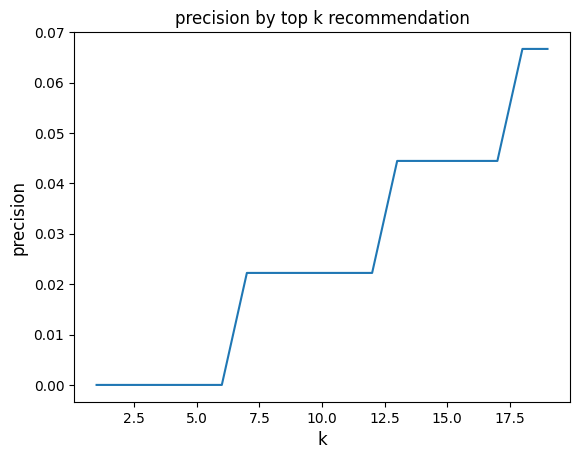

In [81]:
plt.plot(k_param_list, precision_list)
plt.title('precision by top k recommendation')
plt.ylabel('precision', fontsize=12)
plt.xlabel('k', fontsize=12)
plt.show()

In [85]:
# 개인별 추천 목록에서 method별로 예측 정확도를 구하는 함수(TOP K MAP)
def calc_topk_map_by_method(top_k, method):
    user_metric = []
    has_rec_user_count = 0

    # 개인을 위한 metric 만들기.
    for user_id in user_rec_dict:
        if method in user_rec_dict[user_id] and 'liked_movies' in user_rec_dict[user_id]:
            if len(user_rec_dict[user_id][method]) >= top_k:
                if method == 'total_recommendations':
                    predict_topk_list = list(user_rec_dict[user_id][method][:top_k])
                else:
                    predict_topk_list = user_rec_dict[user_id][method][:top_k]

                prefer_test_list = user_rec_dict[user_id]['liked_movies']
                user_metric.append([predict_topk_list, prefer_test_list])
                has_rec_user_count += 1

    print('has_rec_user_count:' , str(has_rec_user_count))
    if has_rec_user_count ==0:
        return False

    precision_list = []
    for user in user_metric:
        predictive_values = user[0]
        actual_values = user[1]
        true_positive = [pv for pv in predictive_values if pv in actual_values]
        precision = len(true_positive) / len(predictive_values)
        precision_list.append(precision)
    result = sum(precision_list) / len(precision_list)
    return result

has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 0


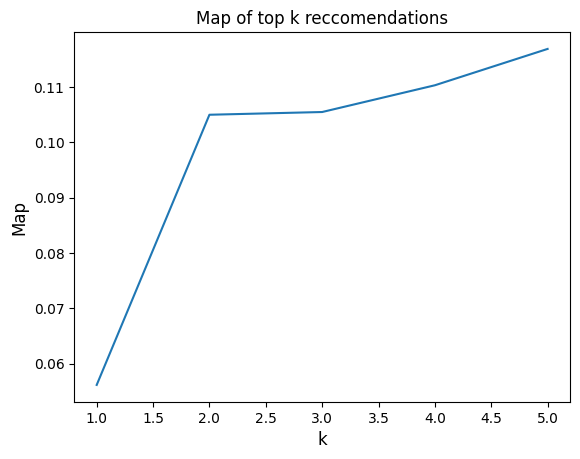

In [87]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_map_by_method(top_k=k, method='user_age_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k reccomendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()

has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762


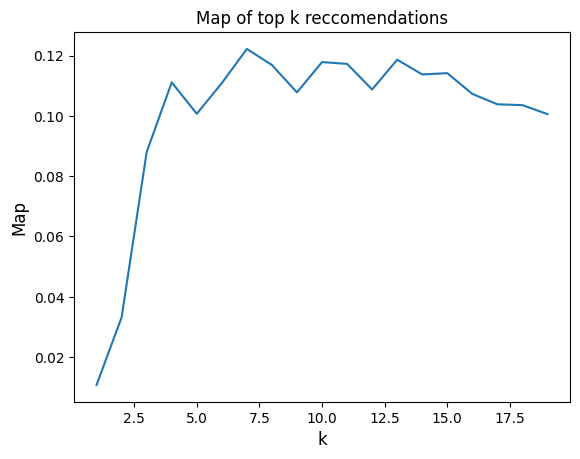

In [89]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_map_by_method(top_k=k, method='high_rating_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k reccomendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()

has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 0


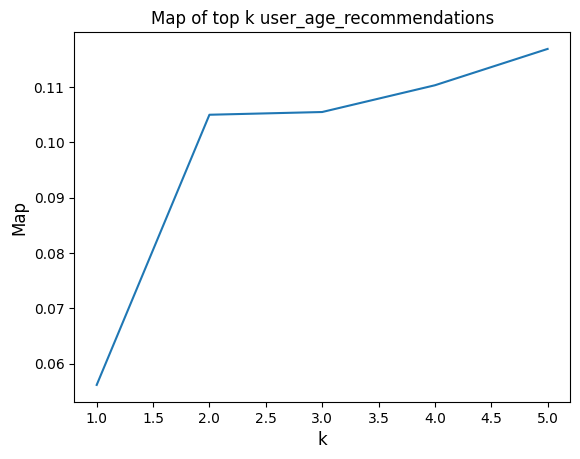

In [91]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_map_by_method(top_k=k, method='user_age_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k user_age_recommendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()

has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762


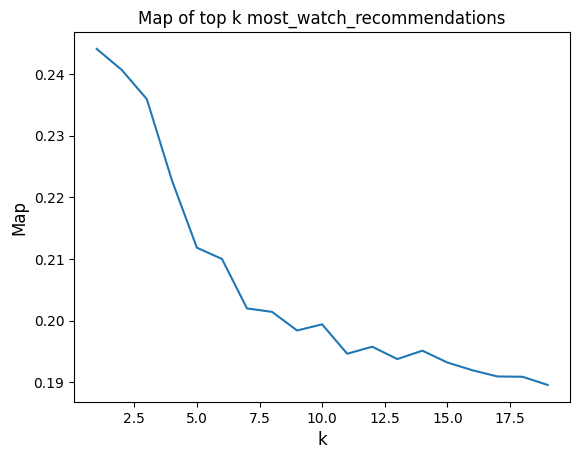

In [92]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_map_by_method(top_k=k, method='most_watch_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k most_watch_recommendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()

### top k recall ###
# 분모만 다르고 나머지는 다 똑같음.

In [94]:
# 개인별 추천 목록에서 method별로 예측 정확도를 구하는 함수(TOP K Recall)
def calc_topk_recall_by_method(top_k, method):
    user_metric = []
    has_rec_user_count = 0

    # 개인을 위한 metric 만들기.
    for user_id in user_rec_dict:
        if method in user_rec_dict[user_id] and 'liked_movies' in user_rec_dict[user_id]:
            if len(user_rec_dict[user_id][method]) >= top_k:
                if method == 'total_recommendations':
                    predict_topk_list = list(user_rec_dict[user_id][method][:top_k])
                else:
                    predict_topk_list = user_rec_dict[user_id][method][:top_k]

                prefer_test_list = user_rec_dict[user_id]['liked_movies']
                user_metric.append([predict_topk_list, prefer_test_list])
                has_rec_user_count += 1

    print('has_rec_user_count:' , str(has_rec_user_count))
    if has_rec_user_count ==0:
        return False

    precision_list = []
    for user in user_metric:
        predictive_values = user[0]
        actual_values = user[1]
        true_positive = [pv for pv in predictive_values if pv in actual_values]
        precision = len(true_positive) / len(actual_values)
        precision_list.append(precision)
    result = sum(precision_list) / len(precision_list)
    return result

has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 1691
has_rec_user_count: 0


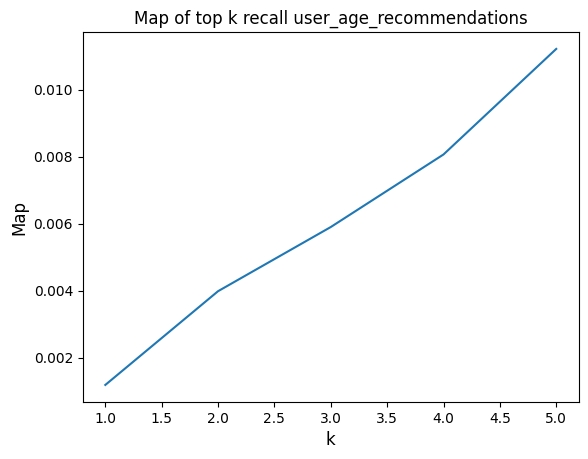

In [95]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_recall_by_method(top_k=k, method='user_age_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k recall user_age_recommendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()

has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762


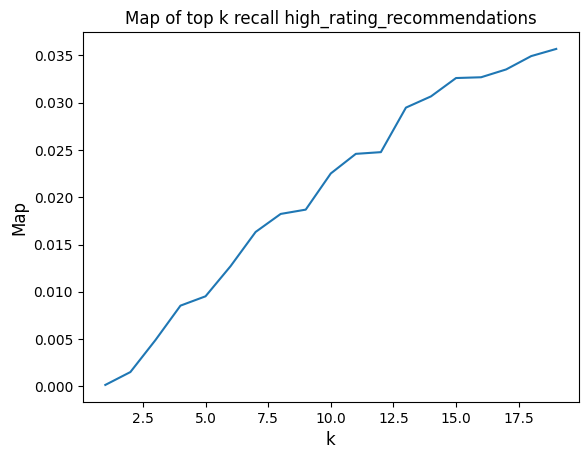

In [96]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_recall_by_method(top_k=k, method='high_rating_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k recall high_rating_recommendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()

has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762
has_rec_user_count: 1762


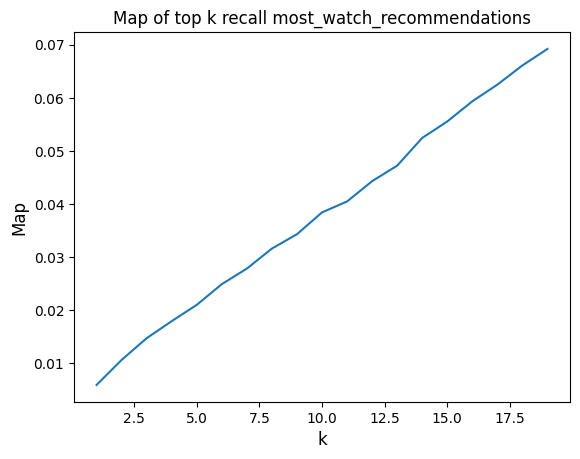

In [97]:
k_params = range(1, 20)
k_list = []
map_list = []
for k in k_params:
    precision = calc_topk_recall_by_method(top_k=k, method='most_watch_recommendations')
    if precision == False:
        break
    map_list.append(precision)
    k_list.append(k)

plt.plot(k_list, map_list)
plt.title('Map of top k recall most_watch_recommendations')
plt.ylabel('Map', fontsize = 12)
plt.xlabel('k', fontsize =12 )
plt.show()